In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import osmnx as ox

/Users/jin/Documents/my_git_repo/airbnb-neighborhood-insights/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Inital Exploration

In [6]:
# Load listings
listings = pd.read_csv('../data/raw/listings.csv')
print(listings.shape)
print(listings.columns.to_list())

(7863, 75)
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',

In [ ]:
listings[['id','name','neighbourhood', 'latitude', 'longitude','price']].head()

,id,name,neighbourhood,latitude,longitude,price
0,45625654,Sunny 2 bedrooms with 2 balconies .,NaN,37.794530,-122.413700,$140.00
1,1286092437845953764,Le Chacuel San Francisco,NaN,37.775114,-122.432849,$360.00
2,9844630,Large room w. pvt balcony & ensuite,NaN,37.753230,-122.436210,NaN
3,1222121015003970585,Private Room near Transportation,NaN,37.726436,-122.439662,$48.00
4,27558226,SanFrancisco Fully Furnished Studio/Apt clean&...,NaN,37.714560,-122.442720,NaN


In [17]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.863000e+03,7.863000e+03,7.863000e+03,7863.000000,7863.000000,0.0,7863.000000,7863.000000,7863.000000,6236.000000,...,6027.000000,6026.000000,6027.000000,6026.000000,6026.000000,7863.000000,7863.000000,7863.000000,7863.000000,6028.000000
mean,4.338911e+17,2.024120e+13,1.668960e+08,232.697444,295.349485,NaN,37.769879,-122.430161,3.227394,1.326090,...,4.775655,4.881173,4.865892,4.782682,4.679034,21.959430,9.371360,12.077833,0.229938,1.260197
std,4.975284e+17,3.906498e-03,1.962473e+08,852.969105,1069.227105,NaN,0.023170,0.027099,2.028399,0.763979,...,0.426479,0.323138,0.350108,0.399178,0.441773,54.143339,28.846442,47.756434,1.958559,1.899132
min,9.580000e+02,2.024120e+13,1.169000e+03,1.000000,1.000000,NaN,37.708280,-122.512460,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.368268e+07,2.024120e+13,8.056112e+06,1.000000,2.000000,NaN,37.755031,-122.442830,2.000000,1.000000,...,4.740000,4.890000,4.880000,4.760000,4.620000,1.000000,0.000000,0.000000,0.000000,0.170000
50%,5.058181e+07,2.024120e+13,6.499665e+07,3.000000,5.000000,NaN,37.775303,-122.422163,2.000000,1.000000,...,4.910000,4.970000,4.980000,4.900000,4.780000,3.000000,1.000000,0.000000,0.000000,0.480000
75%,9.466094e+17,2.024120e+13,3.107313e+08,23.000000,37.000000,NaN,37.788415,-122.410870,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,4.910000,13.000000,2.000000,3.000000,0.000000,1.700000
max,1.303453e+18,2.024120e+13,6.646487e+08,4591.000000,9046.000000,NaN,37.811010,-122.366040,16.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,266.000000,175.000000,264.000000,26.000000,37.170000


In [26]:
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')
listings['price'] = listings['price'].astype(float)

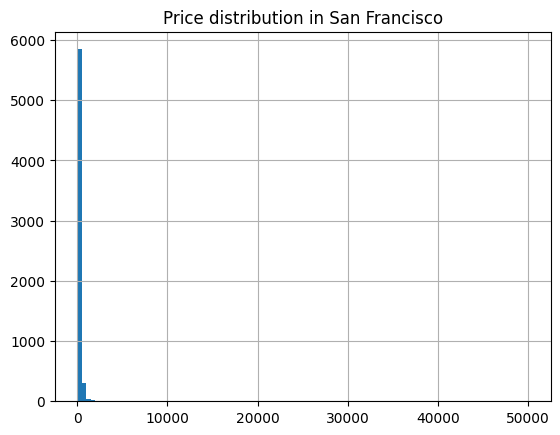

In [30]:
listings['price'].hist(bins=100)
plt.title('Price distribution in San Francisco')
plt.show()


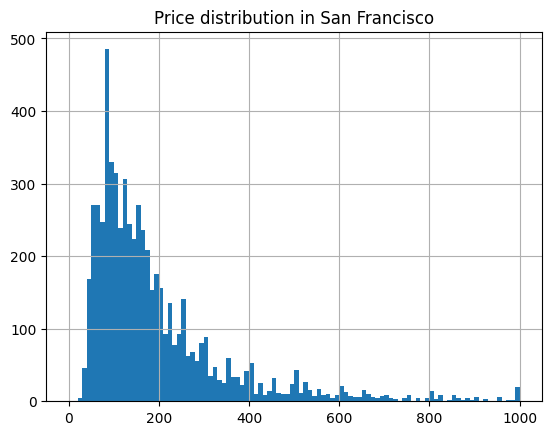

In [31]:
# a few extremely high values are skewing the distribution
# fix 1: remove outliers
listings['price'].hist(bins=100, range=(0,1000))
plt.title('Price distribution in San Francisco')
plt.show()


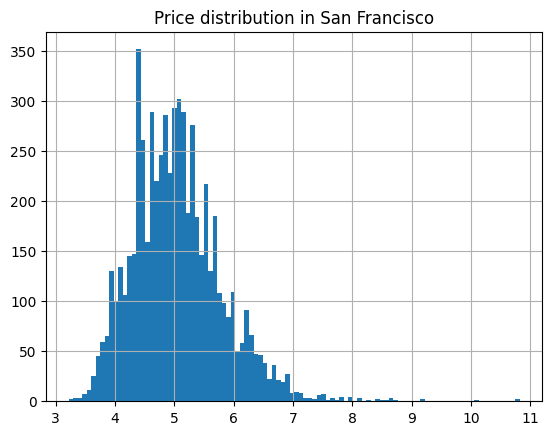

In [32]:
# fix 2: log transformation
import numpy as np
listings['price_log'] = np.log(listings['price'])
listings['price_log'].hist(bins=100)
plt.title('Price distribution in San Francisco')
plt.show()

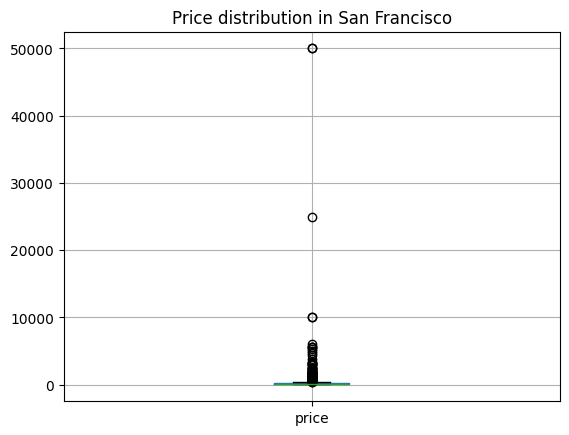

In [33]:
# fix 3: box-plot
listings.boxplot(column='price')
plt.title('Price distribution in San Francisco')
plt.show()

Scout Geospacial Data

In [9]:
sample = listings[['latitude', 'longitude']].iloc[0:10]
sample.head()

,latitude,longitude
0,37.794530,-122.413700
1,37.775114,-122.432849
2,37.753230,-122.436210
3,37.726436,-122.439662
4,37.714560,-122.442720


In [12]:
# A sample latitude and longitude from above
lat, lon = 37.794530,-122.413700

# Get parks within 1km
distance = 1000
tags = {'leisure': 'park'}
parks = ox.features_from_point((lat, lon), tags, dist=distance)

print(f'Found {len(parks)} parks within {distance} meters')
print(parks[['name','geometry']].head())

Found 23 parks within 1000 meters
                                                                name  \
element id                                                             
node    358803650                   Jackson Square Historic District   
        358805401  Russian Hill-Vallejo Street Crest Historic Dis...   
way     18583270                              Washington Square Park   
        25278818                                        Union Square   
        28841124                                 Saint Mary's Square   

                                                            geometry  
element id                                                            
node    358803650                        POINT (-122.40303 37.79687)  
        358805401                        POINT (-122.41491 37.79769)  
way     18583270   POLYGON ((-122.4109 37.8011, -122.41087 37.800...  
        25278818   POLYGON ((-122.40824 37.78808, -122.40815 37.7...  
        28841124   POLYGON ((-122.4

In [13]:
parks[['name','geometry']].to_csv('../data/external/parks_near_sample.csv', index=False)